In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv1D, Flatten, Dense, MaxPooling1D, Dropout
from keras.layers import Dense, Activation, Dropout
from sklearn.preprocessing import LabelEncoder

2024-02-12 20:02:11.018734: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-12 20:02:11.807956: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-12 20:02:11.812737: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-12 20:02:13.579141: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
path  = 'KAGGLE/DATASET-balanced.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.columns

Index(['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20', 'LABEL'],
      dtype='object')

In [5]:
len(data.columns)

27

In [6]:
numerical_columns = data.select_dtypes(include=[np.number]).columns[:-1]

In [7]:
scaler = StandardScaler()

# Normalize the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [8]:
X = data.drop("LABEL", axis=1)
y = data["LABEL"]


In [9]:
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [11]:
# model = Sequential()
# model.add(Dense(512 , input_shape = (X_train.shape[1],)))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))

In [14]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, input_shape=(X_train.shape[1], 1)))  # Adjust kernel size as needed
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size=3))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 12, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5, 64)             0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 64)            

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
295/295 [==============================] - 3s 5ms/step - loss: 0.3191 - accuracy: 0.8655 - val_loss: 0.1391 - val_accuracy: 0.9508
Epoch 2/10
295/295 [==============================] - 2s 5ms/step - loss: 0.1255 - accuracy: 0.9541 - val_loss: 0.0766 - val_accuracy: 0.9737
Epoch 3/10
295/295 [==============================] - 2s 5ms/step - loss: 0.0817 - accuracy: 0.9699 - val_loss: 0.0524 - val_accuracy: 0.9796
Epoch 4/10
295/295 [==============================] - 1s 5ms/step - loss: 0.0621 - accuracy: 0.9787 - val_loss: 0.0386 - val_accuracy: 0.9839
Epoch 5/10
295/295 [==============================] - 1s 5ms/step - loss: 0.0587 - accuracy: 0.9797 - val_loss: 0.0316 - val_accuracy: 0.9856
Epoch 6/10
295/295 [==============================] - 1s 5ms/step - loss: 0.0489 - accuracy: 0.9837 - val_loss: 0.0327 - val_accuracy: 0.9890
Epoch 7/10
295/295 [==============================] - 1s 5ms/step - loss: 0.0403 - accuracy: 0.9869 - val_loss: 0.0318 - val_accuracy: 0.9898
Epoch 

In [18]:
y_pred = model.predict(X_test)
y_pred

37/37 [==============================] - 0s 2ms/step


array([[4.1181251e-01],
       [9.9998128e-01],
       [1.0978241e-04],
       ...,
       [9.9999905e-01],
       [5.9813592e-03],
       [9.8699003e-01]], dtype=float32)

In [19]:
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1, 0)

In [20]:


# Calculate accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Create a confusion matrix (optional)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.9898
Precision: 0.9948
Recall: 0.9846
F1-score: 0.9897
[[591   3]
 [  9 575]]


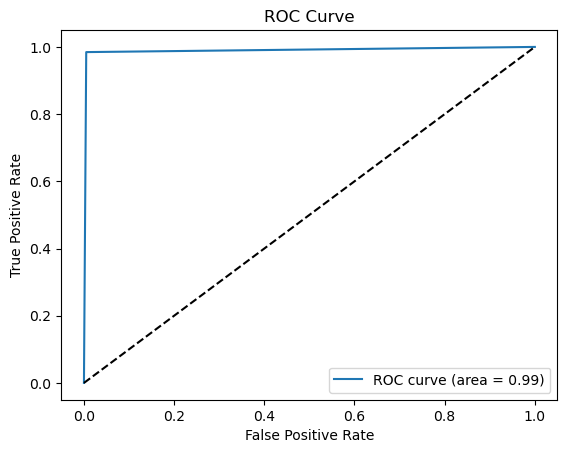

In [21]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()